<a href="https://colab.research.google.com/github/JackSD/Data-Science-Work/blob/master/study_of_volatilty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test of various measures of normalized volatility for various Time series

1) set up the testing data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np



In [3]:
#proving CV is dimensionless 

list_of_time_series = []

#normal - joiner
list_of_time_series.append([100,100,100,100,100,105,105,105,110,111,111,111,111,111])
multiplied_list = [element * 10 for element in list_of_time_series[0]]
list_of_time_series.append(multiplied_list)

#normal - leaver
list_of_time_series.append([100,100,100,100,100,100,100,100,110,111,111,111,111,0])
multiplied_list = [element * 10 for element in list_of_time_series[len(list_of_time_series)-1]]
list_of_time_series.append(multiplied_list)

#normal - volatile
list_of_time_series.append([100,110,120,130,120,110,100,90,90,80,100,111,111,120])
list_of_time_series.append(multiplied_list)

#1 transaction in and out
list_of_time_series.append([100,0,0,0,0,0,0,0,0,0,0,0,0,0])
#many transactions in and out
list_of_time_series.append([500,0,0,0,0,500,0,0,0,0,500,0,0,0])

#many transactions in and out, on base of capital 
multiplied_list = [element + 1000 for element in list_of_time_series[len(list_of_time_series)-1]]
list_of_time_series.append(multiplied_list)

#high freq transactions in and out
list_of_time_series.append([100,0,100,0,100,0,100,0,100,0,100,0,100,0])

#high freq transactions in and out, on a base of capital 
list_of_time_series.append([500,0,500,0,500,0,500,0,500,0,500,0,500,0])
multiplied_list = [element + 1000 for element in list_of_time_series[len(list_of_time_series)-1]]
list_of_time_series.append(multiplied_list)




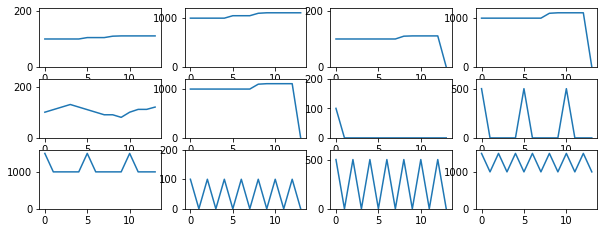

<Figure size 2160x2160 with 0 Axes>

In [145]:
#show the time series graphically:
for i in range(len(list_of_time_series)):
    plt.subplot(4, 4, i+1)
    plt.ylim(0, max(list_of_time_series[i])+100)
    plt.plot(list_of_time_series[i])
    # Show/save figure as desired.

plt.figure(figsize=(30, 30))
plt.show()


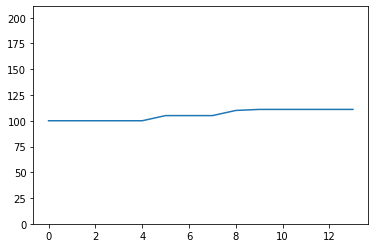

mean=105.71
sd=4.98
coeff_variation=0.05


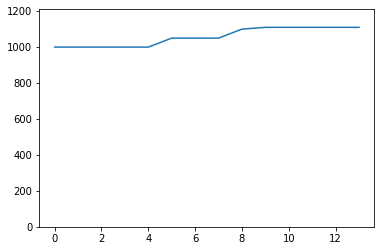

mean=1057.14
sd=49.83
coeff_variation=0.05


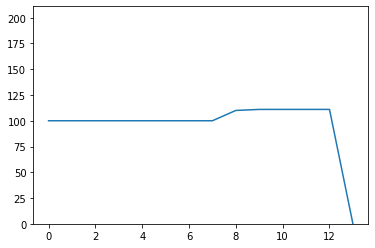

mean=96.71
sd=28.33
coeff_variation=0.29


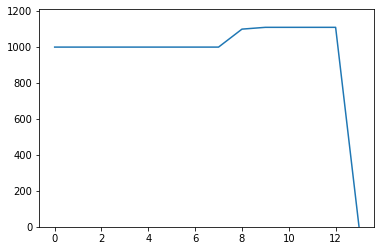

mean=967.14
sd=283.29
coeff_variation=0.29


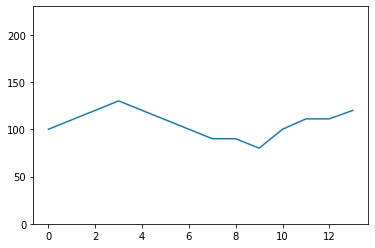

mean=106.57
sd=13.97
coeff_variation=0.13


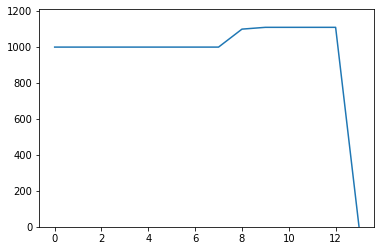

mean=967.14
sd=283.29
coeff_variation=0.29


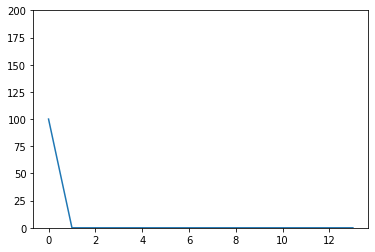

mean=7.14
sd=26.73
coeff_variation=3.74


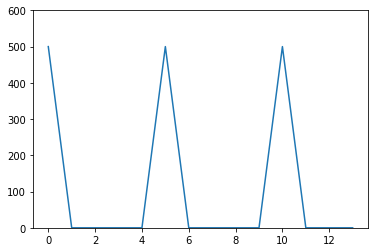

mean=107.14
sd=212.91
coeff_variation=1.99


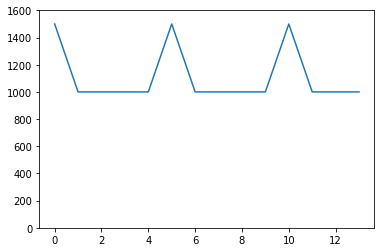

mean=1107.14
sd=212.91
coeff_variation=0.19


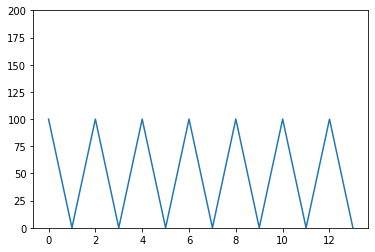

mean=50
sd=51.89
coeff_variation=1.04


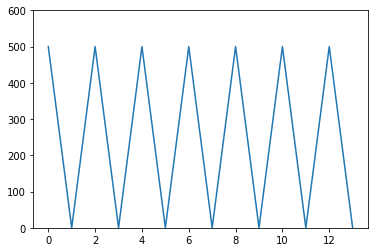

mean=250
sd=259.44
coeff_variation=1.04


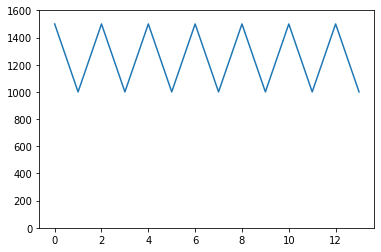

mean=1250
sd=259.44
coeff_variation=0.21


In [24]:
#show the co-efficient of variation (sd/mean)
for i in range(len(list_of_time_series)):
    plt.plot(list_of_time_series[i])
    plt.ylim(0, max(list_of_time_series[i])+100)
    plt.show()
    print('mean=' + str(round(stats.mean(list_of_time_series[i]),2)) )
    print('sd=' + str(round(stats.stdev(list_of_time_series[i]),2)) )
    print('coeff_variation=' + str(round(stats.stdev(list_of_time_series[i])/stats.mean(list_of_time_series[i]),2) ))
    # Show/save figure as desired.



the above coefficient of variation has 2 problems

1) it is less effective work when there is a base value (eg a base of capital)

2) it is lower with more volatility (ie many transactions in and out lowers the COF)

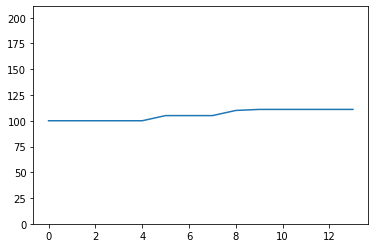

mean=105.71
sd=4.98
[nan, 0.0, 0.0, 0.0, 0.0, 0.050000000000000044, 0.0, 0.0, 0.04761904761904767, 0.009090909090909038, 0.0, 0.0, 0.0, 0.0]
[100, 100, 100, 100, 100, 105, 105, 105, 110, 111, 111, 111, 111, 111]
average daily capital change=0.01


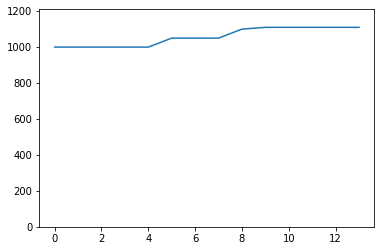

mean=1057.14
sd=49.83
[nan, 0.0, 0.0, 0.0, 0.0, 0.050000000000000044, 0.0, 0.0, 0.04761904761904767, 0.009090909090909038, 0.0, 0.0, 0.0, 0.0]
[1000, 1000, 1000, 1000, 1000, 1050, 1050, 1050, 1100, 1110, 1110, 1110, 1110, 1110]
average daily capital change=0.01


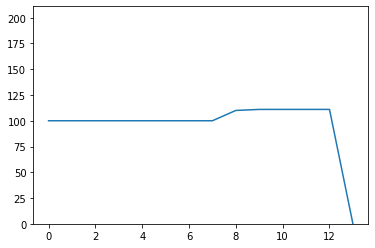

mean=96.71
sd=28.33
[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000000000009, 0.009090909090909038, 0.0, 0.0, 0.0, 1.0]
[100, 100, 100, 100, 100, 100, 100, 100, 110, 111, 111, 111, 111, 0]
average daily capital change=0.09


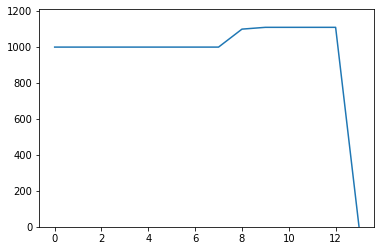

mean=967.14
sd=283.29
[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000000000009, 0.009090909090909038, 0.0, 0.0, 0.0, 1.0]
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1100, 1110, 1110, 1110, 1110, 0]
average daily capital change=0.09


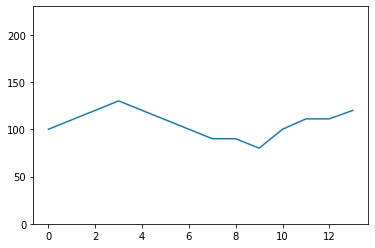

mean=106.57
sd=13.97
[nan, 0.10000000000000009, 0.09090909090909083, 0.08333333333333326, 0.07692307692307687, 0.08333333333333337, 0.09090909090909094, 0.09999999999999998, 0.0, 0.11111111111111116, 0.25, 0.1100000000000001, 0.0, 0.08108108108108114]
[100, 110, 120, 130, 120, 110, 100, 90, 90, 80, 100, 111, 111, 120]
average daily capital change=0.09


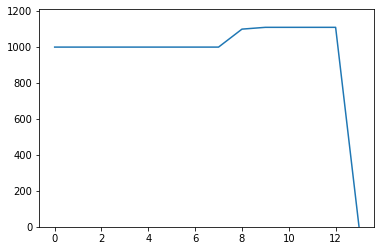

mean=967.14
sd=283.29
[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000000000009, 0.009090909090909038, 0.0, 0.0, 0.0, 1.0]
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1100, 1110, 1110, 1110, 1110, 0]
average daily capital change=0.09


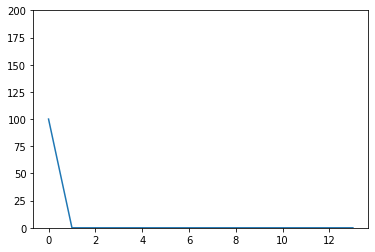

mean=7.14
sd=26.73
[nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
average daily capital change=1.0


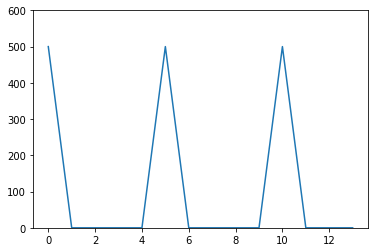

mean=107.14
sd=212.91
[nan, 1.0, nan, nan, nan, 1, 1.0, nan, nan, nan, 1, 1.0, nan, nan]
[500, 0, 0, 0, 0, 500, 0, 0, 0, 0, 500, 0, 0, 0]
average daily capital change=1.0


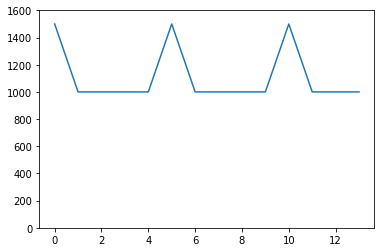

mean=1107.14
sd=212.91
[nan, 0.33333333333333337, 0.0, 0.0, 0.0, 0.5, 0.33333333333333337, 0.0, 0.0, 0.0, 0.5, 0.33333333333333337, 0.0, 0.0]
[1500, 1000, 1000, 1000, 1000, 1500, 1000, 1000, 1000, 1000, 1500, 1000, 1000, 1000]
average daily capital change=0.15


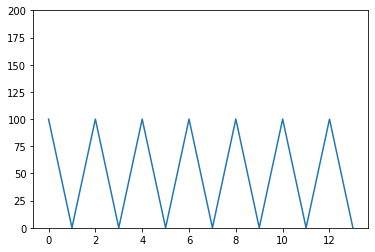

mean=50
sd=51.89
[nan, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0]
[100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0]
average daily capital change=1.0


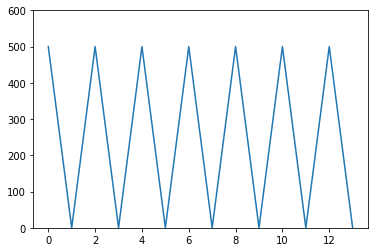

mean=250
sd=259.44
[nan, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0]
[500, 0, 500, 0, 500, 0, 500, 0, 500, 0, 500, 0, 500, 0]
average daily capital change=1.0


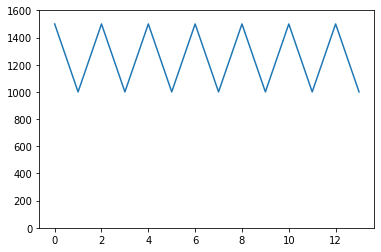

mean=1250
sd=259.44
[nan, 0.33333333333333337, 0.5, 0.33333333333333337, 0.5, 0.33333333333333337, 0.5, 0.33333333333333337, 0.5, 0.33333333333333337, 0.5, 0.33333333333333337, 0.5, 0.33333333333333337]
[1500, 1000, 1500, 1000, 1500, 1000, 1500, 1000, 1500, 1000, 1500, 1000, 1500, 1000]
average daily capital change=0.41


In [26]:
list_of_time_series_percent_change = []
for i in range(len(list_of_time_series)):
  percent_series = pd.Series(list_of_time_series[i])
  a = percent_series.pct_change()
  a = [1 if x==float("inf") else abs(x) for x in a]
  plt.plot(list_of_time_series[i])
  plt.ylim(0, max(list_of_time_series[i])+100)
  plt.show()
  print('mean=' + str(round(stats.mean(list_of_time_series[i]),2)) )
  print('sd=' + str(round(stats.stdev(list_of_time_series[i]),2)) )
  print(a)
  print(list_of_time_series[i])
  print('average daily capital change=' + str(round(np.nanmean(a),2) ))
  list_of_time_series_percent_change.append(a)
list_of_time_series_percent_change.reverse()
#print(list_of_time_series_percent_change)
